In [1]:
# Path setup
import sys
import os
import importlib

%matplotlib inline

sys.path.append(os.path.dirname(os.path.join(os.getcwd(), "../src")))

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io
from PIL import Image
import numpy as np

from src import utils

# Visualize the original label

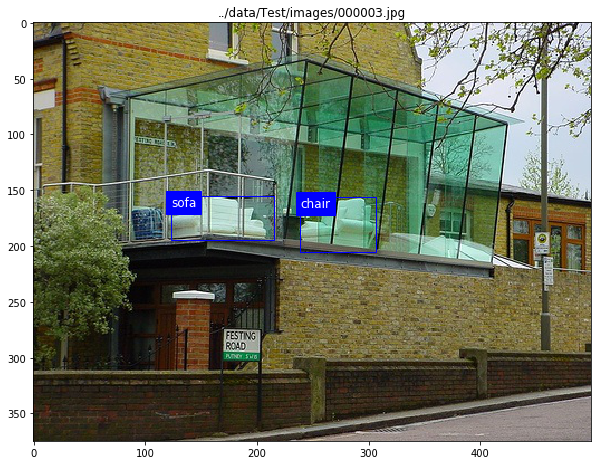

In [3]:
utils.visualize_label("../data/Test/images/000003.jpg", "../data/Test/labels/000003.txt")

# Visualize the preprocess result

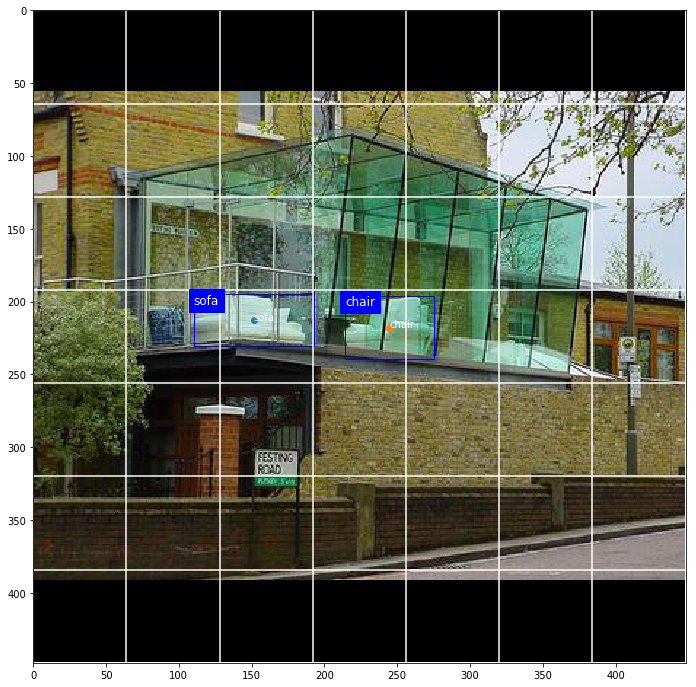

In [4]:
utils.draw_bboxs(
    utils.load_image("../data/Test/pre_images/pre_000003.jpg"), 
    np.load(os.path.join(os.getcwd(), "../data/Test/pre_labels/pre_000003.npy"))
)

# Visualize flipped images

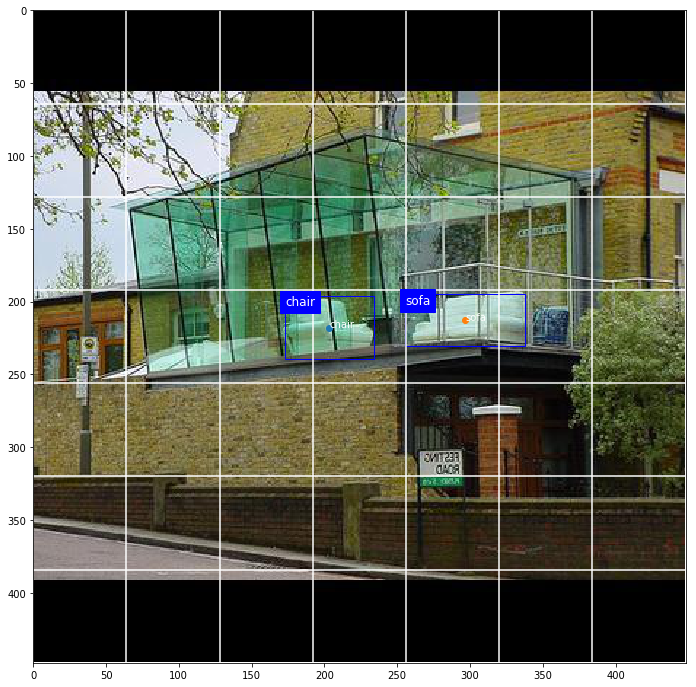

In [5]:
utils.draw_bboxs(
    utils.load_image("../data/Test/arg_images/pre_000003_flip.jpg"), 
    np.load(os.path.join(os.getcwd(), "../data/Test/arg_labels/pre_000003_flip.npy"))
)

# Visualize argumented images

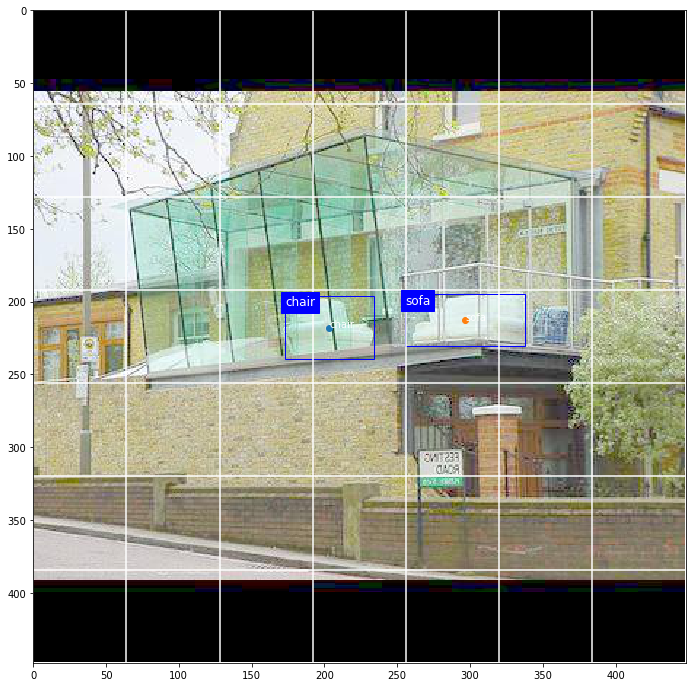

In [20]:
utils.draw_bboxs(
    utils.load_image("../data/Test/arg_images/pre_000003_4.jpg"), 
    np.load(os.path.join(os.getcwd(), "../data/Test/arg_labels/pre_000003_4.npy"))
)

# Visualize ground_truth for mAP calculation

In [5]:
utils.convert_yolo_labels(
    "../data/Test/images/",
    "../data/Test/labels/",
    "../data/Test/ground_truth")

In [6]:
def load_image(image_path):
    if os.path.isabs(image_path):
        path = image_path
    else:
        cwd = os.getcwd()
        path = os.path.join(cwd, image_path)
    img = io.imread(path)

    return img

In [7]:
def load_labels(label_path):
    if os.path.isabs(label_path):
        path = label_path
    else:
        cwd = os.getcwd()
        path = os.path.join(cwd, label_path)

    labels = []
    with open(path, 'r') as fin:
        for line in fin:
            obj = [ num for num in line.split(" ") ]
            labels.append(obj)

    return labels

In [8]:
def visualize_ground_truth(image_path, label_path):
    img = load_image(image_path)
    labels = load_labels(label_path)
    
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_title(image_path)
    ax.imshow(img)
    
    for label in labels:
        class_name = label[0]
        x = int(label[1])
        y = int(label[2])
        w = int(label[3]) - x
        h = int(label[4]) - y
        ax.text(x, y, class_name, fontsize=12, horizontalalignment="left", 
            verticalalignment="top", backgroundcolor="blue", color="white")
        ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, linewidth=1, edgecolor="blue"))

    plt.show()

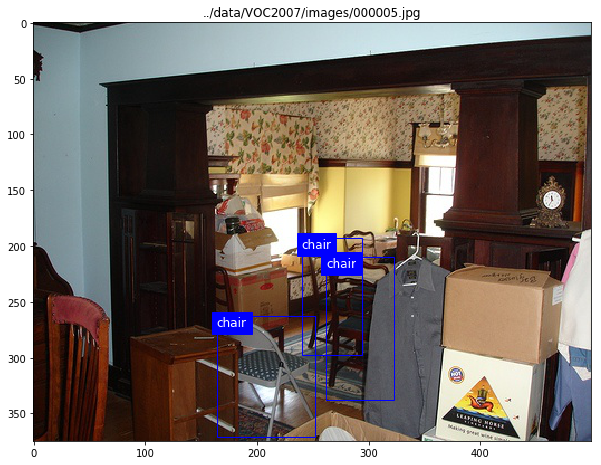

In [25]:
visualize_ground_truth("../data/VOC2007/images/000005.jpg", "../data/VOC2007/ground_truth/000005.txt")

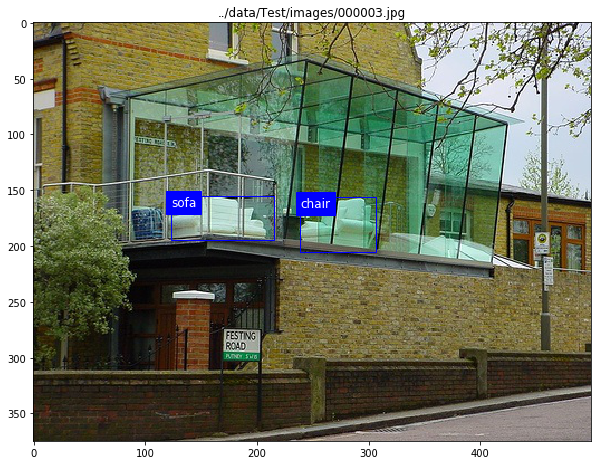

In [19]:
visualize_ground_truth("../data/Test/images/000003.jpg", "../data/Test/ground_truth/000003.txt")

# Visualize prediction for mAP calculation

In [15]:
def visualize_prediction(image_path, label_path):
    img = load_image(image_path)
    labels = load_labels(label_path)
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_title(image_path)
    ax.imshow(img)
    
    for label in labels:
        class_name = label[0] + ":" + str(label[1])
        x = int(label[2])
        y = int(label[3])
        w = int(label[4]) - x
        h = int(label[5]) - y
        ax.text(x, y, class_name, fontsize=12, horizontalalignment="left", 
            verticalalignment="top", backgroundcolor="blue", color="white")
        ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, linewidth=1, edgecolor="blue"))

    plt.show()

[['chair', '0.938766', '224', '226', '308', '332\n'], ['chair', '0.862048', '276', '237', '313', '311\n'], ['chair', '0.830814', '177', '244', '293', '354\n'], ['chair', '0.769690', '138', '254', '253', '364\n']]


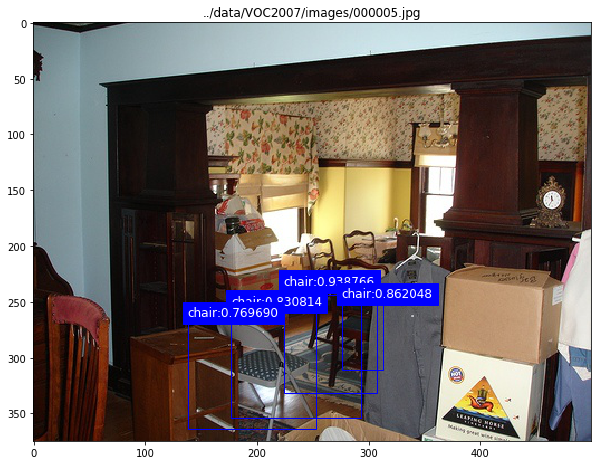

In [26]:
visualize_prediction("../data/VOC2007/images/000005.jpg", "../data/VOC2007/prediction/000005.txt")

[['train', '0.747703', '74', '74', '421', '302\n']]


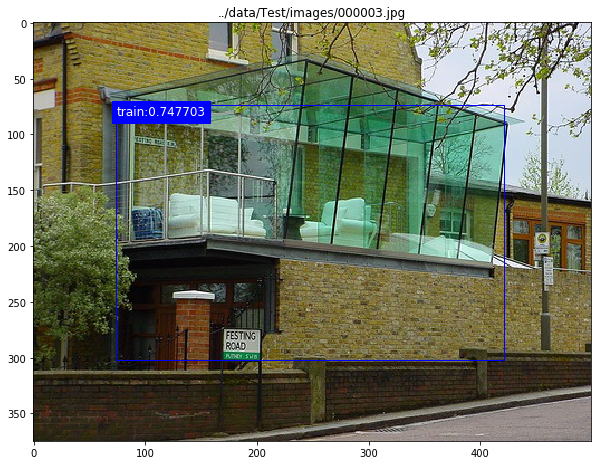

In [23]:
visualize_prediction("../data/Test/images/000003.jpg", "../data/Test/prediction/000003.txt")